# West Nile Virus Analysis & Prediction: Combined Exploratory Data Analysis & Pre-processing

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [13]:
# train_weather_spray = pd.read_csv('./assets/train_weather_spray_v2.csv')
# train_weather_spray.loc[:,'Date'] = pd.to_datetime(train_weather_spray.loc[:,'Date'], format='%Y-%m-%d', errors='raise')
# train_weather_spray.head(3)

In [14]:
# FOR PREVIEWING THE V3 CSV FILE WITH 11 NEW COLUMNS COMPARED TO V2
train_weather_spray_new = pd.read_csv('./assets/train_weather_spray_v3.csv')
train_weather_spray_new.loc[:,'Date'] = pd.to_datetime(train_weather_spray_new.loc[:,'Date'], format='%Y-%m-%d', errors='raise')
train_weather_spray_new.head(3)

,Date,Species,Block,Street,Trap,Latitude,Longitude,WnvPresent,NumMosquitos_sum,reference_weather_stn,...,species_culex_pipiens,species_culex_pipiens_restuans,species_culex_restuans,species_culex_salinarius,species_culex_tarsalis,species_culex_territans,species_unspecified_culex,month_of_year,week_of_year,year_and_month
0,2007-05-29,CULEX PIPIENS/RESTUANS,41,N OAK PARK AVE,T002,41.954690,-87.800991,0,1.0,1,...,0,1,0,0,0,0,0,5,22,2007-05
1,2007-05-29,CULEX RESTUANS,41,N OAK PARK AVE,T002,41.954690,-87.800991,0,1.0,1,...,0,0,1,0,0,0,0,5,22,2007-05
2,2007-05-29,CULEX RESTUANS,62,N MANDELL AVE,T007,41.994991,-87.769279,0,1.0,1,...,0,0,1,0,0,0,0,5,22,2007-05


In [15]:
train_weather_spray.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7370 entries, 0 to 7369
Data columns (total 85 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   Date                             7370 non-null   datetime64[ns]
 1   Species                          7370 non-null   object        
 2   Block                            7370 non-null   int64         
 3   Street                           7370 non-null   object        
 4   Trap                             7370 non-null   object        
 5   Latitude                         7370 non-null   float64       
 6   Longitude                        7370 non-null   float64       
 7   WnvPresent                       7370 non-null   int64         
 8   NumMosquitos_sum                 7370 non-null   float64       
 9   reference_weather_stn            7370 non-null   int64         
 10  Station                          7370 non-null   int64      

From above dataframe information:

- Columns 0 to 9 are the original mosquito and trap data-points from `train_cleaned` dataset in previous notebook.


- Columns 10 to 42 encompass same-day weather information (from `weather_cleaned`) that is linked to the trap record that is generated for a given date.


- Columns 43 to 64 encompass the historical weather data (again from `weather_cleaned`), i.e. 7/14/21 rolling day aggregation of weather effects. Columns 51, 60 and 64 (data_availability_for_7_days, data_availability_for_14_days, data_availability_for_21_days) indicate the number of days in which weather data was available, as a gauge of how representative the historical weather data is for a given trap record.


- Columns 65 to 73 encompass the historical spray data (from `spray_cleaned`), i.e. 7/14/21 rolling dat aggregation of nearby sprays, define by distance values 25, 50m and 75m.

In [16]:
train_weather_spray.loc[train_weather_spray.loc[:,'sp_count_past_7_days_25_meters']>0,:]

,Date,Species,Block,Street,Trap,Latitude,Longitude,WnvPresent,NumMosquitos_sum,reference_weather_stn,...,species_culex_pipiens,species_culex_pipiens_restuans,species_culex_restuans,species_culex_salinarius,species_culex_tarsalis,species_culex_territans,species_unspecified_culex,month_of_year,week_of_year,year_and_month
6113,2013-07-19,CULEX PIPIENS/RESTUANS,89,S CARPENTER ST,T159,41.732984,-87.649642,0,65.0,2,...,0,1,0,0,0,0,0,7,29,2013-07
6114,2013-07-19,CULEX RESTUANS,89,S CARPENTER ST,T159,41.732984,-87.649642,0,15.0,2,...,0,0,1,0,0,0,0,7,29,2013-07
6327,2013-07-25,CULEX PIPIENS/RESTUANS,39,N SPRINGFIELD AVE,T228,41.951866,-87.725057,0,24.0,2,...,0,1,0,0,0,0,0,7,30,2013-07
6723,2013-08-15,CULEX PIPIENS/RESTUANS,13,N LARAMIE AVE,T230,41.904194,-87.756155,1,15.0,2,...,0,1,0,0,0,0,0,8,33,2013-08


In [17]:
train_weather_spray.loc[(train_weather_spray.loc[:,'sp_count_past_14_days_25_meters']>0) & \
(train_weather_spray.loc[:,'Trap']=='T159'),:]

,Date,Species,Block,Street,Trap,Latitude,Longitude,WnvPresent,NumMosquitos_sum,reference_weather_stn,...,species_culex_pipiens,species_culex_pipiens_restuans,species_culex_restuans,species_culex_salinarius,species_culex_tarsalis,species_culex_territans,species_unspecified_culex,month_of_year,week_of_year,year_and_month
6113,2013-07-19,CULEX PIPIENS/RESTUANS,89,S CARPENTER ST,T159,41.732984,-87.649642,0,65.0,2,...,0,1,0,0,0,0,0,7,29,2013-07
6114,2013-07-19,CULEX RESTUANS,89,S CARPENTER ST,T159,41.732984,-87.649642,0,15.0,2,...,0,0,1,0,0,0,0,7,29,2013-07
6237,2013-07-25,CULEX PIPIENS/RESTUANS,89,S CARPENTER ST,T159,41.732984,-87.649642,0,50.0,2,...,0,1,0,0,0,0,0,7,30,2013-07
6238,2013-07-25,CULEX RESTUANS,89,S CARPENTER ST,T159,41.732984,-87.649642,0,20.0,2,...,0,0,1,0,0,0,0,7,30,2013-07


In [18]:
t159 = train_weather_spray.loc[(train_weather_spray.loc[:,'Date']<='2013-07-25') & \
(train_weather_spray.loc[:,'Date']>='2013-07-01') & \
(train_weather_spray.loc[:,'Trap']=='T159'),:]

- 2013-08-15  
- 2013-08-29    
- 2013-07-17    
- 2011-09-07    
- 2013-07-25    
- 2013-08-22    
- 2013-08-08    
- 2013-09-05    
- 2013-08-16    
- 2011-08-29 

In [19]:
t159.loc[t159.loc[:,'Species']=='CULEX PIPIENS/RESTUANS',:]

,Date,Species,Block,Street,Trap,Latitude,Longitude,WnvPresent,NumMosquitos_sum,reference_weather_stn,...,species_culex_pipiens,species_culex_pipiens_restuans,species_culex_restuans,species_culex_salinarius,species_culex_tarsalis,species_culex_territans,species_unspecified_culex,month_of_year,week_of_year,year_and_month
5996,2013-07-12,CULEX PIPIENS/RESTUANS,89,S CARPENTER ST,T159,41.732984,-87.649642,1,27.0,2,...,0,1,0,0,0,0,0,7,28,2013-07
6113,2013-07-19,CULEX PIPIENS/RESTUANS,89,S CARPENTER ST,T159,41.732984,-87.649642,0,65.0,2,...,0,1,0,0,0,0,0,7,29,2013-07
6237,2013-07-25,CULEX PIPIENS/RESTUANS,89,S CARPENTER ST,T159,41.732984,-87.649642,0,50.0,2,...,0,1,0,0,0,0,0,7,30,2013-07


In [20]:
train_weather_spray.loc[train_weather_spray.loc[:,'WnvPresent']==1,:]

,Date,Species,Block,Street,Trap,Latitude,Longitude,WnvPresent,NumMosquitos_sum,reference_weather_stn,...,species_culex_pipiens,species_culex_pipiens_restuans,species_culex_restuans,species_culex_salinarius,species_culex_tarsalis,species_culex_territans,species_unspecified_culex,month_of_year,week_of_year,year_and_month
493,2007-07-18,CULEX PIPIENS/RESTUANS,38,E 115TH ST,T215,41.686398,-87.531635,1,63.0,2,...,0,1,0,0,0,0,0,7,29,2007-07
601,2007-08-01,CULEX PIPIENS/RESTUANS,41,N OAK PARK AVE,T002,41.954690,-87.800991,1,104.0,1,...,0,1,0,0,0,0,0,8,31,2007-08
606,2007-08-01,CULEX PIPIENS/RESTUANS,79,W FOSTER AVE,T015,41.974089,-87.824812,1,11.0,1,...,0,1,0,0,0,0,0,8,31,2007-08
623,2007-08-01,CULEX PIPIENS/RESTUANS,22,W 113TH ST,T086,41.688324,-87.676709,1,223.0,2,...,0,1,0,0,0,0,0,8,31,2007-08
635,2007-08-01,CULEX PIPIENS,22,W 89TH ST,T096,41.731922,-87.677512,1,17.0,2,...,1,0,0,0,0,0,0,8,31,2007-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7278,2013-09-19,CULEX PIPIENS/RESTUANS,10,W OHARE AIRPORT,T900,41.974689,-87.890615,1,47.0,1,...,0,1,0,0,0,0,0,9,38,2013-09
7320,2013-09-26,CULEX PIPIENS,46,N MILWAUKEE AVE,T003,41.964242,-87.757639,1,3.0,1,...,1,0,0,0,0,0,0,9,39,2013-09
7342,2013-09-26,CULEX PIPIENS/RESTUANS,63,W 64TH ST,T155,41.776156,-87.778927,1,4.0,2,...,0,1,0,0,0,0,0,9,39,2013-09
7354,2013-09-26,CULEX PIPIENS/RESTUANS,10,W OHARE AIRPORT,T900,41.974689,-87.890615,1,43.0,1,...,0,1,0,0,0,0,0,9,39,2013-09


In [21]:
train_weather_spray.columns

Index(['Date', 'Species', 'Block', 'Street', 'Trap', 'Latitude', 'Longitude',
       'WnvPresent', 'NumMosquitos_sum', 'reference_weather_stn', 'Station',
       'Tmax', 'Tmin', 'Tavg', 'Depart', 'DewPoint', 'WetBulb', 'Heat', 'Cool',
       'PrecipTotal', 'StnPressure', 'SeaLevel', 'ResultSpeed', 'ResultDir',
       'AvgSpeed', 'Sunrise_datetime', 'Sunset_datetime', 'CodeSum_BCFG',
       'CodeSum_BR', 'CodeSum_DZ', 'CodeSum_FG', 'CodeSum_FG+', 'CodeSum_FU',
       'CodeSum_GR', 'CodeSum_HZ', 'CodeSum_MIFG', 'CodeSum_RA', 'CodeSum_SN',
       'CodeSum_SQ', 'CodeSum_TS', 'CodeSum_TSRA', 'CodeSum_VCFG',
       'CodeSum_VCTS', 'Tavg_mean_past7day', 'WetBulb_mean_past7day',
       'AvgSpeed_mean_past7day', 'Heat_mean_past7day', 'Cool_mean_past7day',
       'CodeSum_RA_sum_past7day', 'CodeSum_TSRA_sum_past7day',
       'CodeSum_DZ_sum_past7day', 'data_availability_for_7_days',
       'Tavg_mean_past14day', 'WetBulb_mean_past14day',
       'AvgSpeed_mean_past14day', 'Heat_mean_past14day', '

In [22]:
wnv_present_df = train_weather_spray.loc[(train_weather_spray.loc[:,'WnvPresent']==1) & \
(train_weather_spray.loc[:,'data_availability_for_7_days']>5) & \
(train_weather_spray.loc[:,'data_availability_for_14_days']>10) & \
(train_weather_spray.loc[:,'data_availability_for_21_days']>20) \
,:]

In [23]:
wnv_absent_df = train_weather_spray.loc[(train_weather_spray.loc[:,'WnvPresent']==0) & \
(train_weather_spray.loc[:,'data_availability_for_7_days']>5) & \
(train_weather_spray.loc[:,'data_availability_for_14_days']>10) & \
(train_weather_spray.loc[:,'data_availability_for_21_days']>20) \
,:]

In [24]:
tws_complete = train_weather_spray.loc[
(train_weather_spray.loc[:,'data_availability_for_7_days']>5) & \
(train_weather_spray.loc[:,'data_availability_for_14_days']>10) & \
(train_weather_spray.loc[:,'data_availability_for_21_days']>20) \
,:]

In [25]:
wnv_present_df.describe()

,Block,Latitude,Longitude,WnvPresent,NumMosquitos_sum,reference_weather_stn,Station,Tmax,Tmin,Tavg,...,species_culex_erraticus,species_culex_pipiens,species_culex_pipiens_restuans,species_culex_restuans,species_culex_salinarius,species_culex_tarsalis,species_culex_territans,species_unspecified_culex,month_of_year,week_of_year
count,397.000000,397.000000,397.000000,397.0,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000,...,397.0,397.000000,397.000000,397.000000,397.0,397.0,397.0,397.0,397.000000,397.000000
mean,42.372796,41.873747,-87.732374,1.0,45.007557,1.672544,1.672544,83.264484,65.994962,74.886650,...,0.0,0.392947,0.501259,0.105793,0.0,0.0,0.0,0.0,8.168766,33.778338
std,22.882706,0.108618,0.083547,0.0,82.588199,0.469877,0.469877,6.375305,6.048622,5.606161,...,0.0,0.489022,0.500629,0.307961,0.0,0.0,0.0,0.0,0.585370,2.407109
min,10.000000,41.659112,-87.890615,1.0,1.000000,1.000000,1.000000,59.000000,46.000000,54.000000,...,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,6.000000,26.000000
25%,22.000000,41.776428,-87.795585,1.0,10.000000,1.000000,1.000000,80.000000,62.000000,73.000000,...,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,8.000000,32.000000
50%,42.000000,41.912563,-87.731435,1.0,21.000000,2.000000,2.000000,83.000000,69.000000,75.000000,...,0.0,0.000000,1.000000,0.000000,0.0,0.0,0.0,0.0,8.000000,34.000000
75%,60.000000,41.973845,-87.677512,1.0,46.000000,2.000000,2.000000,87.000000,69.000000,78.000000,...,0.0,1.000000,1.000000,0.000000,0.0,0.0,0.0,0.0,9.000000,35.000000
max,93.000000,42.011601,-87.531635,1.0,984.000000,2.000000,2.000000,97.000000,79.000000,87.000000,...,0.0,1.000000,1.000000,1.000000,0.0,0.0,0.0,0.0,10.000000,40.000000


In [26]:
import seaborn as sns

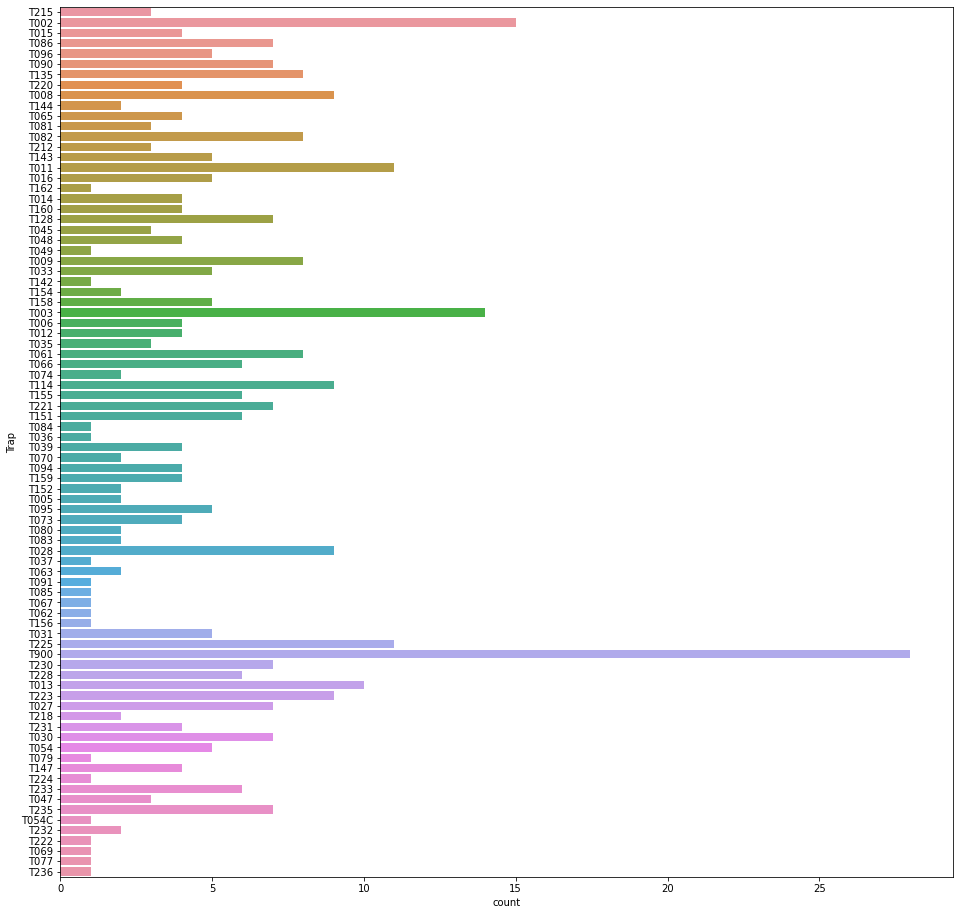

In [27]:
plt.figure(figsize=(16,16))
sns.countplot(data=wnv_present_df, y=wnv_present_df.loc[:,'Trap'])
plt.show()

In [28]:
train_weather_spray.loc[train_weather_spray.loc[:,'Trap']=='T900','WnvPresent'].value_counts()

0    148
1     28
Name: WnvPresent, dtype: int64

In [29]:
train_weather_spray.loc[train_weather_spray.loc[:,'Trap']=='T900','Date'].groupby(train_weather_spray.Date.dt.year).agg('count')

Date
2009    57
2011    62
2013    57
Name: Date, dtype: int64

In [30]:
train_weather_spray.loc[train_weather_spray.loc[:,'Trap']=='T900','Date'].groupby(train_weather_spray.Date.dt.month_name()).agg('count')

Date
August       51
July         45
June         33
May           1
October       3
September    43
Name: Date, dtype: int64

<AxesSubplot:title={'center':'WNV Presence count by month'}, xlabel='Date'>

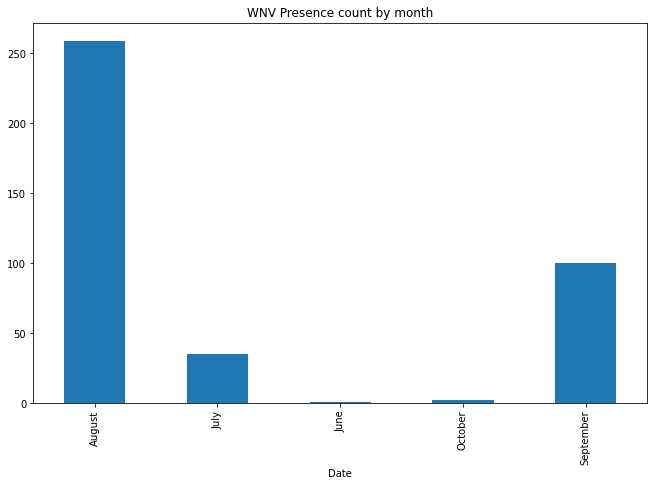

In [31]:
plt.figure(figsize=(11,7))
wnv_present_df.loc[:,'Date'].groupby(wnv_present_df.Date.dt.month_name()).agg('count').sort_index(ascending=True).plot(kind='bar',title='WNV Presence count by month')

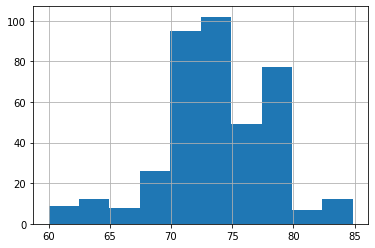

In [32]:
wnv_present_df['Tavg_mean_past7day'].hist()
plt.show()

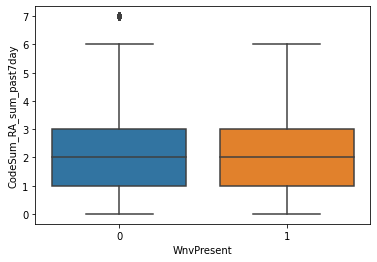

In [33]:
sns.boxplot(data=train_weather_spray, y='CodeSum_RA_sum_past7day', x='WnvPresent')
plt.show()

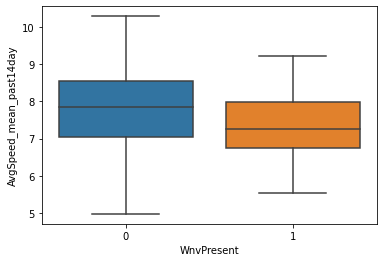

In [34]:
sns.boxplot(data=train_weather_spray, y='AvgSpeed_mean_past14day', x='WnvPresent')
plt.show()

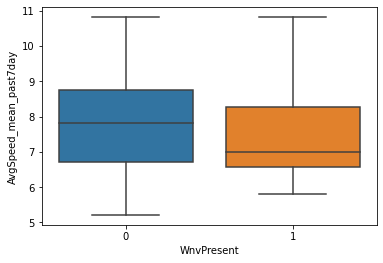

In [35]:
sns.boxplot(data=tws_complete, y='AvgSpeed_mean_past7day', x='WnvPresent')
plt.show()

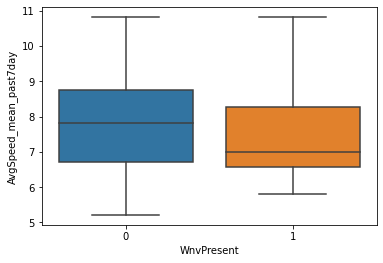

In [36]:
sns.boxplot(data=tws_complete, y='AvgSpeed_mean_past7day', x='WnvPresent')
plt.show()

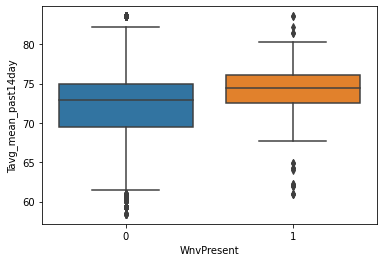

In [37]:
sns.boxplot(data=train_weather_spray, y='Tavg_mean_past14day', x='WnvPresent')
plt.show()

'Tavg_mean_past14day', 'WetBulb_mean_past14day',
       'AvgSpeed_mean_past14day', 'Heat_mean_past14day', 'Cool_mean_past14day',
       'CodeSum_RA_sum_past14day', 'CodeSum_TSRA_sum_past14day',
       'CodeSum_DZ_sum_past14day', 'data_availability_for_14_days',
       'CodeSum_RA_sum_past21day', 'CodeSum_TSRA_sum_past21day',
       'CodeSum_DZ_sum_past21day', 'data_availability_for_21_days',
       'sp_count_past_7_days_25_meters', 'sp_count_past_7_days_50_meters',
       'sp_count_past_7_days_75_meters', 'sp_count_past_14_days_25_meters',
       'sp_count_past_14_days_50_meters', 'sp_count_past_14_days_75_meters',
       'sp_count_past_21_days_25_meters', 'sp_count_past_21_days_50_meters',
       'sp_count_past_21_days_75_meters'

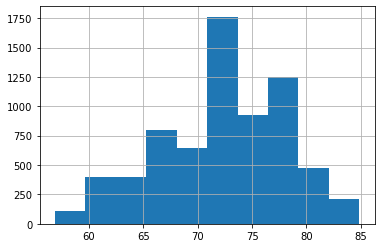

In [38]:
wnv_absent_df['Tavg_mean_past7day'].hist()
plt.show()

In [39]:
plt.figure(figsize=(15,10))
train_weather_spray

,Date,Species,Block,Street,Trap,Latitude,Longitude,WnvPresent,NumMosquitos_sum,reference_weather_stn,...,species_culex_pipiens,species_culex_pipiens_restuans,species_culex_restuans,species_culex_salinarius,species_culex_tarsalis,species_culex_territans,species_unspecified_culex,month_of_year,week_of_year,year_and_month
0,2007-05-29,CULEX PIPIENS/RESTUANS,41,N OAK PARK AVE,T002,41.954690,-87.800991,0,1.0,1,...,0,1,0,0,0,0,0,5,22,2007-05
1,2007-05-29,CULEX RESTUANS,41,N OAK PARK AVE,T002,41.954690,-87.800991,0,1.0,1,...,0,0,1,0,0,0,0,5,22,2007-05
2,2007-05-29,CULEX RESTUANS,62,N MANDELL AVE,T007,41.994991,-87.769279,0,1.0,1,...,0,0,1,0,0,0,0,5,22,2007-05
3,2007-05-29,CULEX PIPIENS/RESTUANS,79,W FOSTER AVE,T015,41.974089,-87.824812,0,1.0,1,...,0,1,0,0,0,0,0,5,22,2007-05
4,2007-05-29,CULEX RESTUANS,79,W FOSTER AVE,T015,41.974089,-87.824812,0,4.0,1,...,0,0,1,0,0,0,0,5,22,2007-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7365,2013-09-26,CULEX PIPIENS/RESTUANS,51,W 72ND ST,T035,41.763733,-87.742302,1,6.0,2,...,0,1,0,0,0,0,0,9,39,2013-09
7366,2013-09-26,CULEX PIPIENS/RESTUANS,58,N RIDGE AVE,T231,41.987280,-87.666066,0,5.0,2,...,0,1,0,0,0,0,0,9,39,2013-09
7367,2013-09-26,CULEX PIPIENS/RESTUANS,17,N ASHLAND AVE,T232,41.912563,-87.668055,0,1.0,2,...,0,1,0,0,0,0,0,9,39,2013-09
7368,2013-09-26,CULEX PIPIENS/RESTUANS,71,N HARLEM AVE,T233,42.009876,-87.807277,0,5.0,1,...,0,1,0,0,0,0,0,9,39,2013-09


<Figure size 1080x720 with 0 Axes>

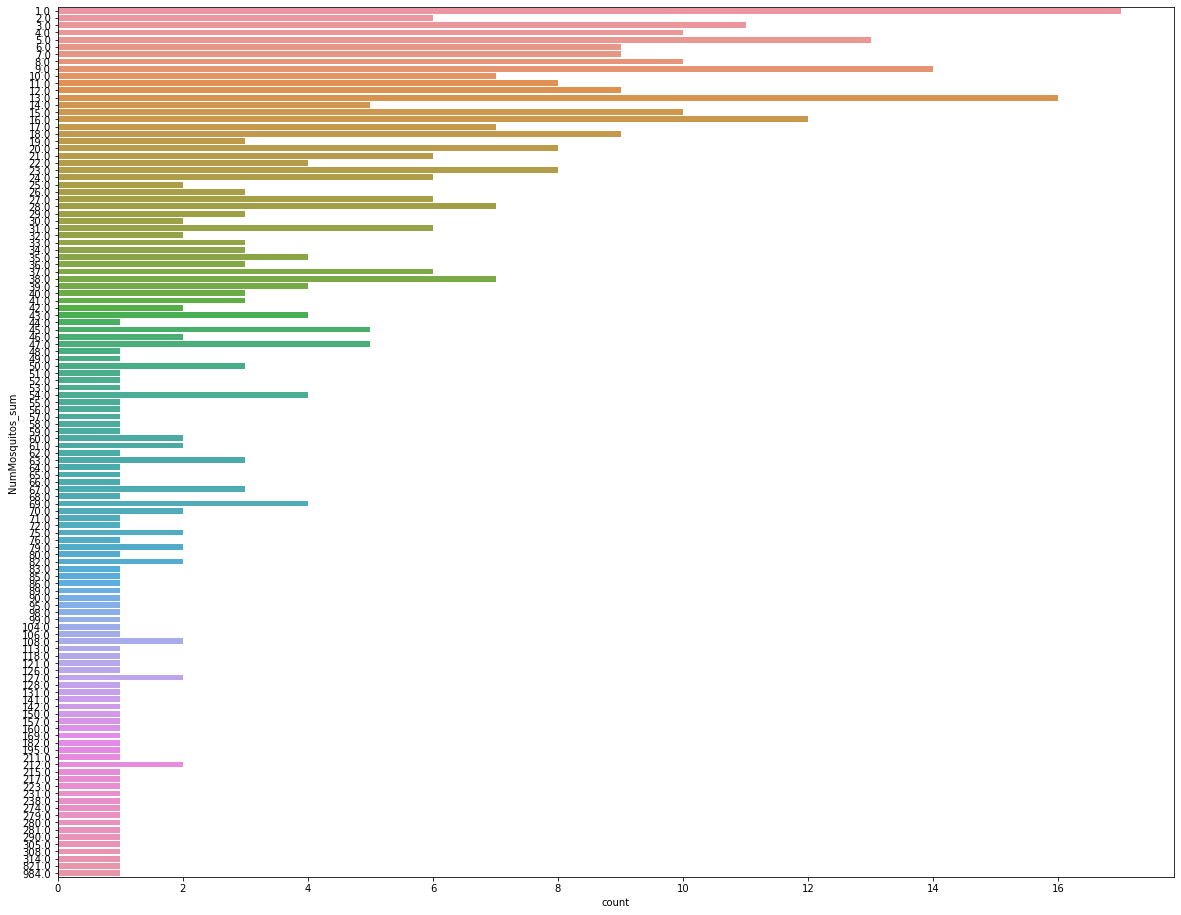

In [40]:
plt.figure(figsize=(20,16))
sns.countplot(data=wnv_present_df, y=wnv_present_df.loc[:,'NumMosquitos_sum'])
plt.show()

In [41]:
train_weather_spray.groupby('Date').mean()

,Block,Latitude,Longitude,WnvPresent,NumMosquitos_sum,reference_weather_stn,Station,Tmax,Tmin,Tavg,...,species_culex_erraticus,species_culex_pipiens,species_culex_pipiens_restuans,species_culex_restuans,species_culex_salinarius,species_culex_tarsalis,species_culex_territans,species_unspecified_culex,month_of_year,week_of_year
Date,,,,,,,,,,,,,,,,,,,,,
2007-05-29,34.782609,41.875646,-87.703528,0.000000,1.608696,1.739130,1.739130,88.000000,63.695652,76.217391,...,0.00000,0.043478,0.347826,0.608696,0.000000,0.0,0.0,0.0,5.0,22.0
2007-06-05,37.310345,41.885381,-87.718861,0.000000,2.120690,1.775862,1.775862,63.224138,50.103448,56.775862,...,0.00000,0.086207,0.344828,0.568966,0.000000,0.0,0.0,0.0,6.0,23.0
2007-06-26,40.753846,41.900750,-87.725513,0.000000,3.246154,1.707692,1.707692,91.292308,72.123077,81.707692,...,0.00000,0.046154,0.369231,0.569231,0.015385,0.0,0.0,0.0,6.0,26.0
2007-06-29,38.022727,41.888533,-87.717365,0.000000,1.863636,1.772727,1.772727,70.772727,56.000000,63.772727,...,0.00000,0.090909,0.386364,0.522727,0.000000,0.0,0.0,0.0,6.0,26.0
2007-07-02,40.757143,41.889261,-87.722345,0.000000,3.357143,1.742857,1.742857,77.514286,56.714286,67.485714,...,0.00000,0.028571,0.500000,0.442857,0.028571,0.0,0.0,0.0,7.0,27.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2013-08-29,43.631068,41.876440,-87.717504,0.242718,33.815534,1.747573,1.747573,87.504854,68.242718,78.000000,...,0.00000,0.330097,0.543689,0.126214,0.000000,0.0,0.0,0.0,8.0,35.0
2013-09-06,39.805310,41.866898,-87.714399,0.221239,27.592920,1.769912,1.769912,85.230088,60.849558,73.539823,...,0.00885,0.460177,0.451327,0.079646,0.000000,0.0,0.0,0.0,9.0,36.0
2013-09-12,40.527273,41.869188,-87.706587,0.163636,20.663636,1.809091,1.809091,82.809091,62.809091,72.809091,...,0.00000,0.390909,0.472727,0.136364,0.000000,0.0,0.0,0.0,9.0,37.0


## Scatter plot of spray done

In [43]:
train_weather_spray_new.columns

Index(['Date', 'Species', 'Block', 'Street', 'Trap', 'Latitude', 'Longitude',
       'WnvPresent', 'NumMosquitos_sum', 'reference_weather_stn', 'Station',
       'Tmax', 'Tmin', 'Tavg', 'Depart', 'DewPoint', 'WetBulb', 'Heat', 'Cool',
       'PrecipTotal', 'StnPressure', 'SeaLevel', 'ResultSpeed', 'ResultDir',
       'AvgSpeed', 'Sunrise_datetime', 'Sunset_datetime', 'CodeSum_BCFG',
       'CodeSum_BR', 'CodeSum_DZ', 'CodeSum_FG', 'CodeSum_FG+', 'CodeSum_FU',
       'CodeSum_GR', 'CodeSum_HZ', 'CodeSum_MIFG', 'CodeSum_RA', 'CodeSum_SN',
       'CodeSum_SQ', 'CodeSum_TS', 'CodeSum_TSRA', 'CodeSum_VCFG',
       'CodeSum_VCTS', 'Tavg_mean_past7day', 'WetBulb_mean_past7day',
       'AvgSpeed_mean_past7day', 'Heat_mean_past7day', 'Cool_mean_past7day',
       'CodeSum_RA_sum_past7day', 'CodeSum_TSRA_sum_past7day',
       'CodeSum_DZ_sum_past7day', 'data_availability_for_7_days',
       'Tavg_mean_past14day', 'WetBulb_mean_past14day',
       'AvgSpeed_mean_past14day', 'Heat_mean_past14day', '

In [253]:
def subplot_scatterplots(dataframe, list_of_columns, y_ax, sup_title='NA'):   
    # Set titles, labels, etc here for each subplot
    nrows = int(np.ceil(len(list_of_columns)/2)) # Makes sure you have enough rows
    if len(list_of_columns) >= 2:
        figsize=(25,20)
    else:
        figsize=(11,7)
    fig, ax = plt.subplots(nrows=nrows, ncols=2, figsize=figsize) # You'll want to specify your figsize
    ax = ax.ravel() # Ravel turns a matrix into a vector, which is easier to iterate
    fig.suptitle(sup_title, fontsize=25)   
   
    for i, column in enumerate(list_of_columns): # Gives us an index value to get into all our lists
        sns.scatterplot(x=column, y = y_ax, data=dataframe, color='red', ax=ax[i])
        # Set titles, labels, etc here for each subplot
       
        ax[i].set_title(list_of_columns[i] + ' ' + 'vs' + ' ' + y_ax, fontsize=15)
        #ax[i].set_xticks(fontsize=15)
        ax[i].set_xlabel(column,fontsize=15)
        ax[i].set_ylabel(y_ax,fontsize=15)
        # Sets the xticks positions in the x-axis
        ax[i].set_xticks(np.arange(max(dataframe[column].unique())+1))
        # Sets the fontsize of both the axis
        ax[i].tick_params(axis='both', labelsize=15)
       
    plt.tight_layout(pad=3.0)
    
    
        #pad=3.0

NameError: name 'ax' is not defined

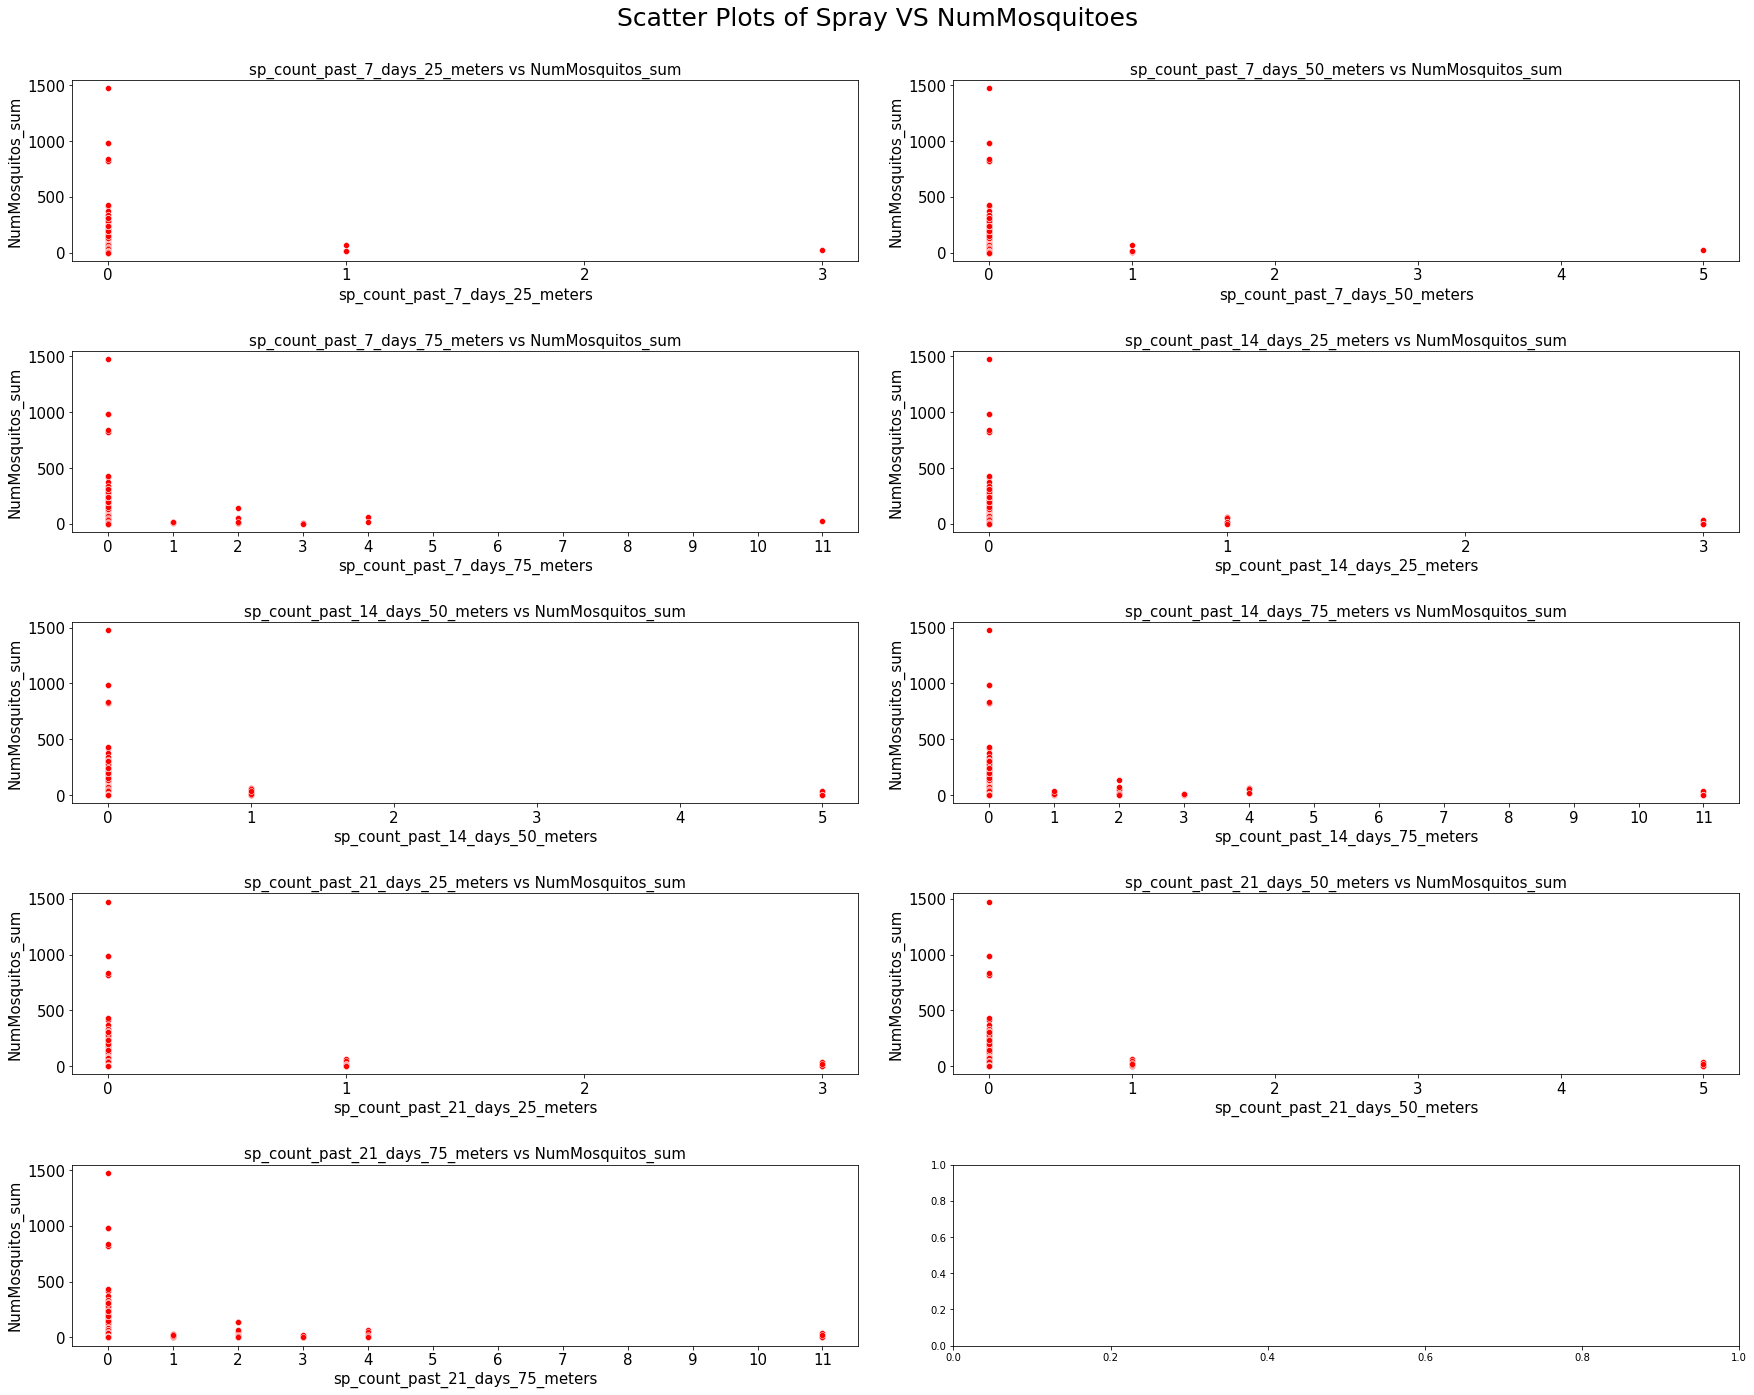

In [256]:
spray = ['sp_count_past_7_days_25_meters', 'sp_count_past_7_days_50_meters',
       'sp_count_past_7_days_75_meters', 'sp_count_past_14_days_25_meters',
       'sp_count_past_14_days_50_meters', 'sp_count_past_14_days_75_meters',
       'sp_count_past_21_days_25_meters', 'sp_count_past_21_days_50_meters',
       'sp_count_past_21_days_75_meters']

subplot_scatterplots(train_weather_spray_new, spray, 'NumMosquitos_sum', sup_title='Scatter Plots of Spray VS NumMosquitoes')
# Removes the last plot as it's empty
ax.flat[-1].set_visible(False)

There seems to be a trend where when there is spray done, it significantly reduces the number of mosquitos. This highlights the spray's effectiveness in bringing down the number of mosquitoes

## Countplot of all `Codesum` Features

<AxesSubplot:title={'center':'Count plot for all CodeSum Features'}>

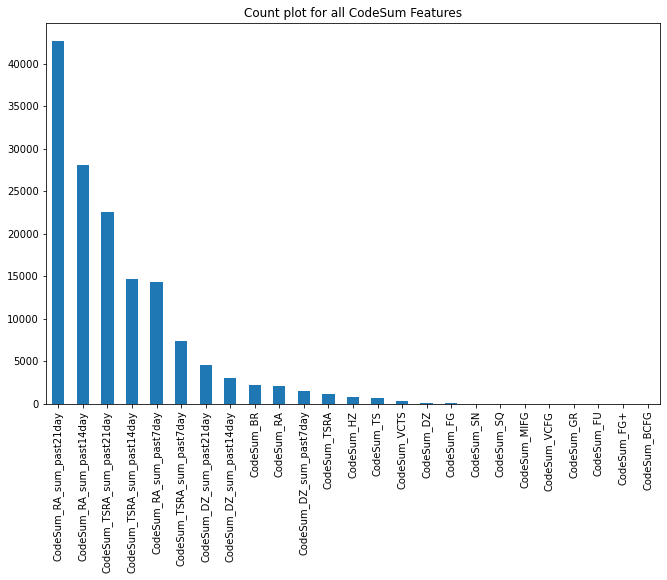

In [235]:
codesum_cols = train_weather_spray_new.columns[train_weather_spray_new.columns.str.contains('CodeSum')]

plt.figure(figsize=(11,7))
plt.title('Count plot for all CodeSum Features')
train_weather_spray_new[codesum_cols].sum(axis=0).sort_values(ascending=False).plot(kind='bar')

In [229]:
train_weather_spray_new[codesum_cols]

,CodeSum_BCFG,CodeSum_BR,CodeSum_DZ,CodeSum_FG,CodeSum_FG+,CodeSum_FU,CodeSum_GR,CodeSum_HZ,CodeSum_MIFG,CodeSum_RA,...,CodeSum_VCTS,CodeSum_RA_sum_past7day,CodeSum_TSRA_sum_past7day,CodeSum_DZ_sum_past7day,CodeSum_RA_sum_past14day,CodeSum_TSRA_sum_past14day,CodeSum_DZ_sum_past14day,CodeSum_RA_sum_past21day,CodeSum_TSRA_sum_past21day,CodeSum_DZ_sum_past21day
0,0,1,0,0,0,0,0,1,0,0,...,0,4,1,0,6,1,0,7,1,0
1,0,1,0,0,0,0,0,1,0,0,...,0,4,1,0,6,1,0,7,1,0
2,0,1,0,0,0,0,0,1,0,0,...,0,4,1,0,6,1,0,7,1,0
3,0,1,0,0,0,0,0,1,0,0,...,0,4,1,0,6,1,0,7,1,0
4,0,1,0,0,0,0,0,1,0,0,...,0,4,1,0,6,1,0,7,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7365,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,0,1,2,0,1
7366,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,0,1,2,0,1
7367,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,0,1,2,0,1
7368,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,2,1,0,3,1,0


## Find any correlation between NumMosquitos and the top CodeSum features

In [236]:
top_10_codesum = list(train_weather_spray_new[codesum_cols].sum(axis=0).sort_values(ascending=False).index[:11])
top_10_codesum.append('NumMosquitos_sum')

<AxesSubplot:>

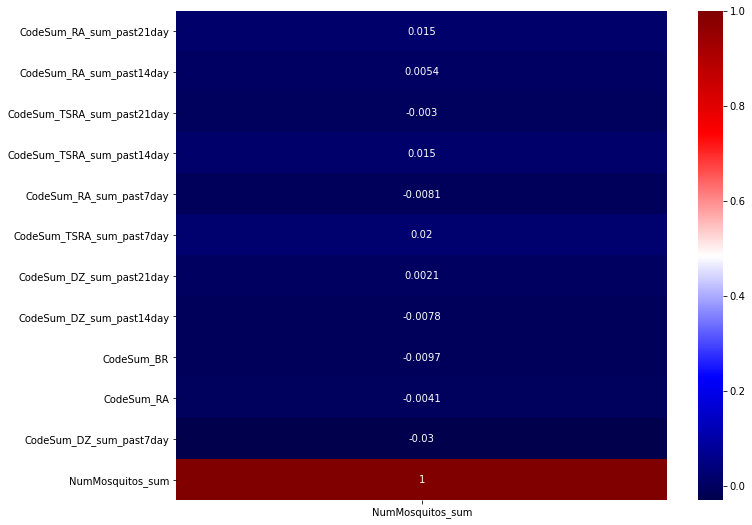

In [244]:
# mask = np.zeros_like(train_weather_spray_new.corr()[top_10_codesum].T)
# mask[np.triu_indices_from(mask)] = True


plt.figure(figsize=(11,9))
sns.heatmap(pd.DataFrame(train_weather_spray_new[top_10_codesum].corr()['NumMosquitos_sum']), cmap='seismic', annot=True)

Does not seem to be any correlation between the number of mosquitos and the rainy weather pattern.This is likely due to mosquitos breeding more during the warmer seasons compared to the cooler seasons.

In [247]:
btm_10_codesum = list(train_weather_spray_new[codesum_cols].sum(axis=0).sort_values(ascending=False).index[-10:])
btm_10_codesum.append('NumMosquitos_sum')

<AxesSubplot:>

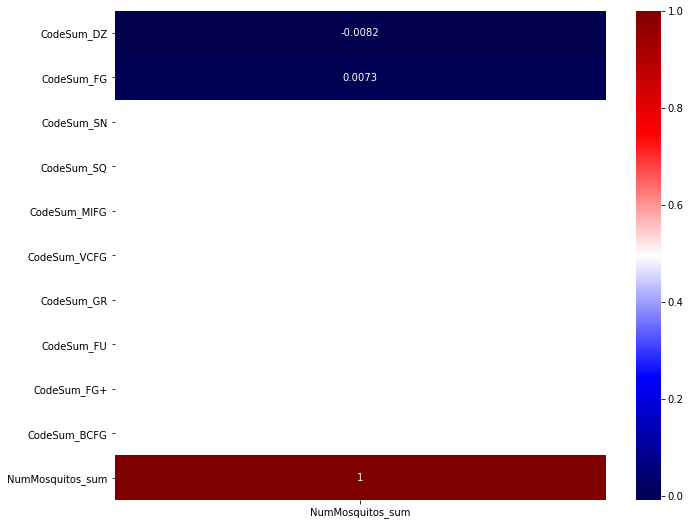

In [249]:
plt.figure(figsize=(11,9))
sns.heatmap(pd.DataFrame(train_weather_spray_new[btm_10_codesum].corr()['NumMosquitos_sum']), cmap='seismic', annot=True)

## NumMosquitos_sum and Tavg

In [250]:
train_weather_spray_new.columns

Index(['Date', 'Species', 'Block', 'Street', 'Trap', 'Latitude', 'Longitude',
       'WnvPresent', 'NumMosquitos_sum', 'reference_weather_stn', 'Station',
       'Tmax', 'Tmin', 'Tavg', 'Depart', 'DewPoint', 'WetBulb', 'Heat', 'Cool',
       'PrecipTotal', 'StnPressure', 'SeaLevel', 'ResultSpeed', 'ResultDir',
       'AvgSpeed', 'Sunrise_datetime', 'Sunset_datetime', 'CodeSum_BCFG',
       'CodeSum_BR', 'CodeSum_DZ', 'CodeSum_FG', 'CodeSum_FG+', 'CodeSum_FU',
       'CodeSum_GR', 'CodeSum_HZ', 'CodeSum_MIFG', 'CodeSum_RA', 'CodeSum_SN',
       'CodeSum_SQ', 'CodeSum_TS', 'CodeSum_TSRA', 'CodeSum_VCFG',
       'CodeSum_VCTS', 'Tavg_mean_past7day', 'WetBulb_mean_past7day',
       'AvgSpeed_mean_past7day', 'Heat_mean_past7day', 'Cool_mean_past7day',
       'CodeSum_RA_sum_past7day', 'CodeSum_TSRA_sum_past7day',
       'CodeSum_DZ_sum_past7day', 'data_availability_for_7_days',
       'Tavg_mean_past14day', 'WetBulb_mean_past14day',
       'AvgSpeed_mean_past14day', 'Heat_mean_past14day', '

<AxesSubplot:xlabel='Tavg', ylabel='NumMosquitos_sum'>

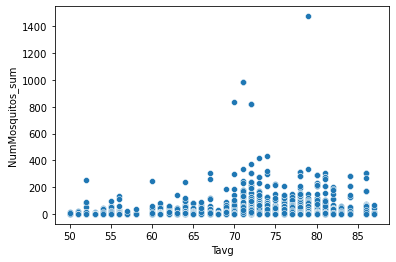

In [251]:
sns.scatterplot(x='Tavg', y='NumMosquitos_sum', data=train_weather_spray_new)

Need to consider plotting:

* count plot of WNV positives by year
* Mean/Total NumOfMosquito by year
* Mean Tavg group by year
* Total PrecipTotal by year
* See if years with higher Tavg and lower PrecipTotal will lead to more mozzies/WNV occurrences

## count plot of WNV positives by year

Text(0, 0.5, 'Year')

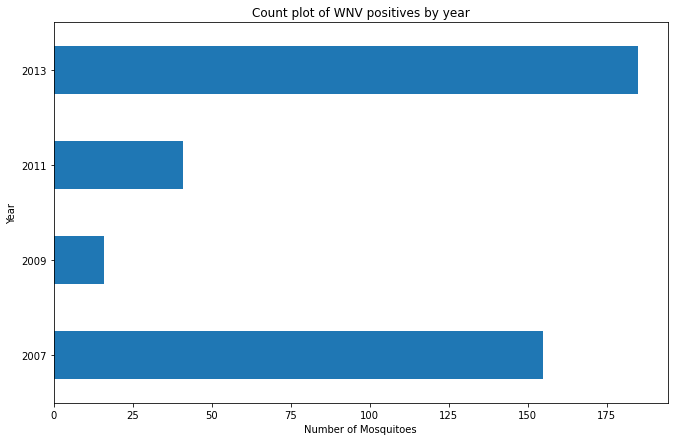

In [335]:
train_weather_spray_new[train_weather_spray_new['WnvPresent'] == 1].groupby(train_weather_spray_new['Date'].dt.year).count()['Date'].plot(kind='barh', figsize = (11,7),
                                                                                                                                         title='Count plot of WNV positives by year')

plt.xlabel('Number of Mosquitoes')
plt.ylabel('Year')

The highest WNV presence was in 2013 followed by 2007. 2009 showed the least WNV presence.

## Mean/Total NumOfMosquito by year

Text(0, 0.5, 'Year')

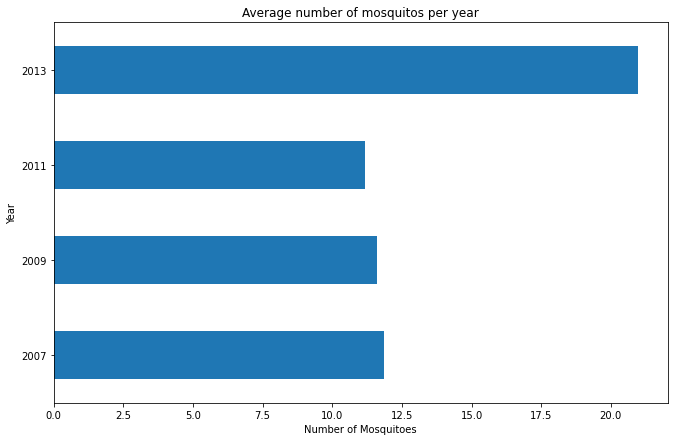

In [336]:
# Mean NumOfMOsquito by year
train_weather_spray_new.groupby(train_weather_spray_new['Date'].dt.year).mean()['NumMosquitos_sum'].plot(kind='barh',
                                                                                                         figsize= (11,7),
                                                                                                        title='Average number of mosquitos per year')

plt.xlabel('Number of Mosquitoes')
plt.ylabel('Year')

Text(0, 0.5, 'Year')

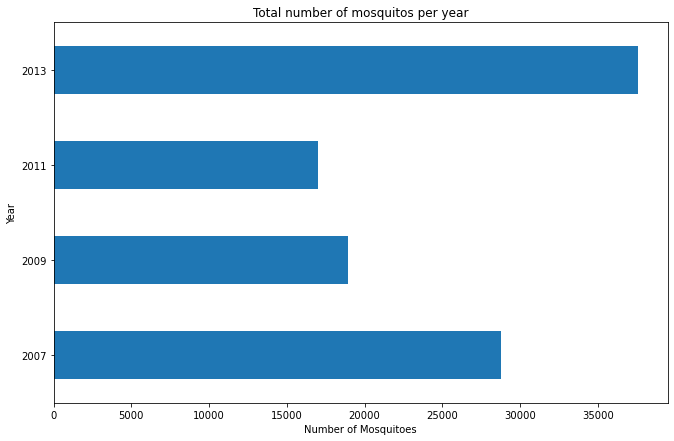

In [337]:
# Total number NumOfMOsquito by year
train_weather_spray_new.groupby(train_weather_spray_new['Date'].dt.year).sum()['NumMosquitos_sum'].plot(kind='barh',
                                                                                                         figsize= (11,7),
                                                                                                        title='Total number of mosquitos per year')
plt.xlabel('Number of Mosquitoes')
plt.ylabel('Year')

There seems to be a trend where the increase in the number of mosquitos leads to an increase in the WNV presence as 2007 and 2013 shows the highest number of mosquitos and WNV presence.

## Mean Tavg group by year

Text(0, 0.5, 'Year')

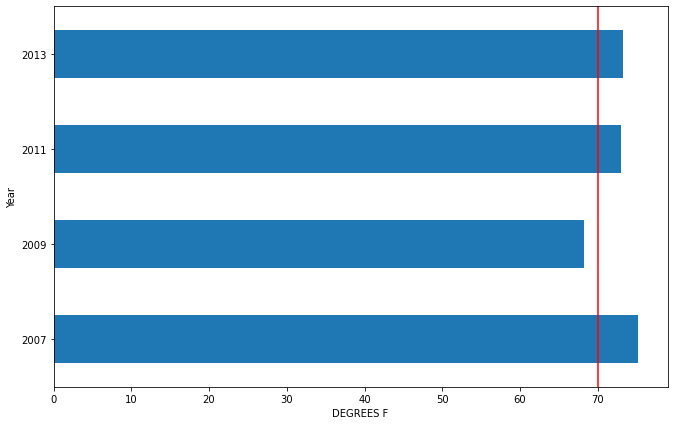

In [338]:
train_weather_spray_new.groupby(train_weather_spray_new['Date'].dt.year).mean()['Tavg'].plot(kind='barh', figsize=(11,7))

plt.xlabel('DEGREES F')
# plt.axvline(70,color='red')

plt.ylabel('Year')

## Total PrecipTotal by year

Text(0, 0.5, 'Year')

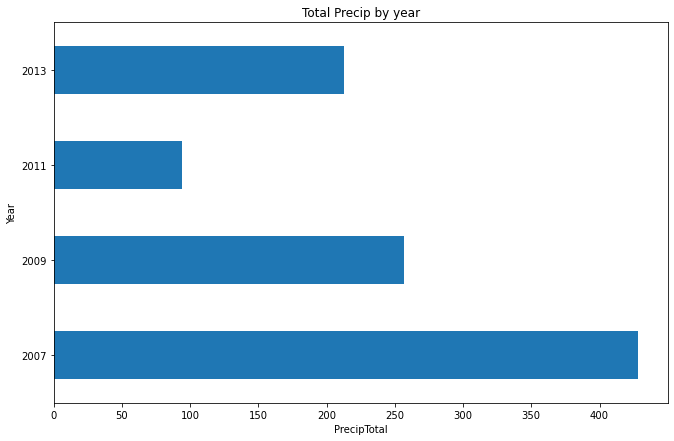

In [339]:
train_weather_spray_new.groupby(train_weather_spray_new['Date'].dt.year).sum()['PrecipTotal'].plot(kind='barh', 
                                                                                                   figsize=(11,7),
                                                                                                   title='Total Precip by year')

plt.xlabel('PrecipTotal')
plt.ylabel('Year')

## Plotting both Tavg and PrecipTotal

Text(0, 0.5, 'PrecipTotal')

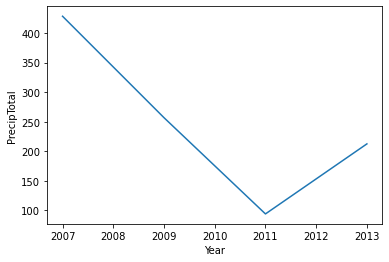

In [373]:
train_weather_spray_new.groupby(train_weather_spray_new['Date'].dt.year).sum()['PrecipTotal'].plot(kind='line')

plt.xlabel('Year')
plt.ylabel('PrecipTotal')

Text(0, 0.5, 'Total number of mosquitoes')

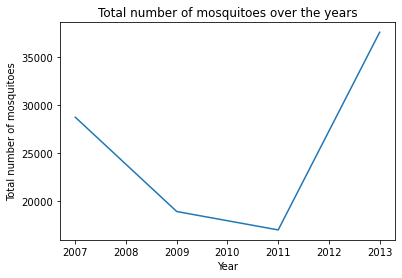

In [377]:
train_weather_spray_new.groupby(train_weather_spray_new['Date'].dt.year).sum()['NumMosquitos_sum'].plot(kind='line', 
                                                                                                        title='Total number of mosquitoes over the years')


plt.xlabel('Year')
plt.ylabel('Total number of mosquitoes')

Text(0, 0.5, 'Average temperature of the years')

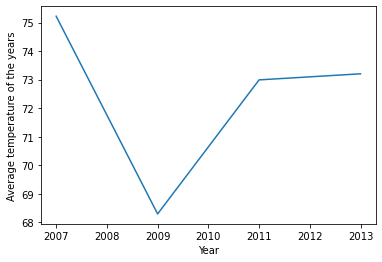

In [379]:
train_weather_spray_new.groupby(train_weather_spray_new['Date'].dt.year).mean()['Tavg'].plot(kind='line')

plt.xlabel('Year')
plt.ylabel('Average temperature of the years')